In [ ]:
#importação de bibliotecas
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# lê o arquivo CSV
df = pd.read_csv('/content/grafo_2019.csv', sep=',')

In [ ]:
df.head()

anoboletim  codboletim bairro_vitima bairro_ocorrencia
0        2019         880        CAJURU   JARDIM BOTANICO
1        2019         893   BAIRRO ALTO            CENTRO
2        2019         911    FAZENDINHA        FAZENDINHA
3        2019        1073       UBERABA           UBERABA
4        2019        1118        CAJURU            CAJURU

In [ ]:
df.shape

(28982, 4)

In [ ]:
# Elimando valores em branco
df_g = df[['bairro_ocorrencia', 'bairro_vitima']].dropna(how='any')

# Retirando pares de nós iguais
#df_g = df_g[df_g['bairro_ocorrencia'] != df_g['bairro_vitima']]

# Contando quantidade de ligações iguais para representar o peso da ligação
df_g = df_g.groupby(['bairro_ocorrencia', 'bairro_vitima']).size().reset_index(name = 'weight')

# Filtrando apenas ligações com peso maior que 1
df_g = df_g[df_g['weight'] > 1]

df_g

bairro_ocorrencia bairro_vitima  weight
0            ABRANCHES     ABRANCHES      68
5            ABRANCHES   BARREIRINHA       9
6            ABRANCHES         BATEL       2
8            ABRANCHES     BOA VISTA       2
11           ABRANCHES        CABRAL       2
...                ...           ...     ...
2622             XAXIM     TATUQUARA       6
2623             XAXIM       UBERABA       6
2624             XAXIM        UMBARA       6
2625             XAXIM   VILA IZABEL       2
2626             XAXIM         XAXIM     471

[1689 rows x 3 columns]

In [ ]:
G = nx.convert_matrix.from_pandas_edgelist(df_g, 'bairro_ocorrencia', 'bairro_vitima', ['weight'])

type(G)

networkx.classes.graph.Graph

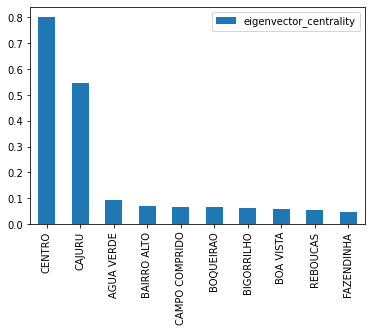

In [ ]:
# Calculando os valores de centralidade
eigenvector_centrality=nx.eigenvector_centrality_numpy(G, weight='weight')

# Atribuindo os valores aos nós do grafo
nx.set_node_attributes(G, eigenvector_centrality, 'eigenvector_centr')

# Exibindo os valores em um gráfico de barras
df_importancia = pd.DataFrame([eigenvector_centrality], index=['eigenvector_centrality']).T
df_importancia.sort_values('eigenvector_centrality', ascending=False).head(10).plot.bar()

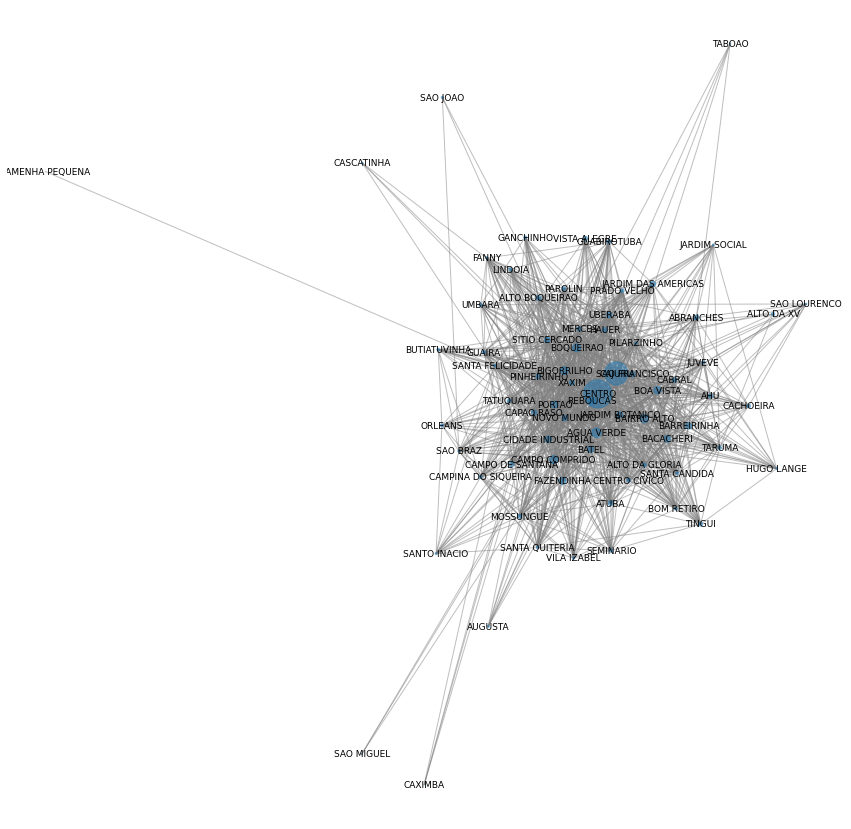

In [ ]:
plt.figure(figsize=(15, 15))

node_sizes = [v * 1000 for v in eigenvector_centrality.values()]

# Define as posições para exibição dos nós
pos = nx.spring_layout(G)

# Desenha os rótulos (bairros)
nx.draw_networkx_labels(G, pos, font_size = 9)

# Desenha o restante do grafo
nx.draw(G, pos, node_size=node_sizes, alpha = 0.5, edge_color='grey')

In [ ]:
G.nodes['CENTRO']

{'eigenvector_centr': 0.8018074704631385}

In [ ]:
G.edges('CENTRO')

EdgeDataView([('CENTRO', 'AGUA VERDE'), ('CENTRO', 'AHU'), ('CENTRO', 'ALTO BOQUEIRAO'), ('CENTRO', 'ALTO DA GLORIA'), ('CENTRO', 'ATUBA'), ('CENTRO', 'BACACHERI'), ('CENTRO', 'BARREIRINHA'), ('CENTRO', 'BATEL'), ('CENTRO', 'BIGORRILHO'), ('CENTRO', 'BOA VISTA'), ('CENTRO', 'BOM RETIRO'), ('CENTRO', 'BOQUEIRAO'), ('CENTRO', 'CABRAL'), ('CENTRO', 'CAJURU'), ('CENTRO', 'CAMPINA DO SIQUEIRA'), ('CENTRO', 'CAPAO RASO'), ('CENTRO', 'ABRANCHES'), ('CENTRO', 'ALTO DA XV'), ('CENTRO', 'AUGUSTA'), ('CENTRO', 'BAIRRO ALTO'), ('CENTRO', 'BUTIATUVINHA'), ('CENTRO', 'CACHOEIRA'), ('CENTRO', 'CAMPO COMPRIDO'), ('CENTRO', 'CAMPO DE SANTANA'), ('CENTRO', 'CASCATINHA'), ('CENTRO', 'CENTRO'), ('CENTRO', 'CENTRO CIVICO'), ('CENTRO', 'CIDADE INDUSTRIAL'), ('CENTRO', 'FANNY'), ('CENTRO', 'FAZENDINHA'), ('CENTRO', 'GANCHINHO'), ('CENTRO', 'GUABIROTUBA'), ('CENTRO', 'GUAIRA'), ('CENTRO', 'HAUER'), ('CENTRO', 'HUGO LANGE'), ('CENTRO', 'JARDIM BOTANICO'), ('CENTRO', 'JARDIM DAS AMERICAS'), ('CENTRO', 'JARDIM S

In [ ]:
df_g.head(20)

bairro_ocorrencia   bairro_vitima  weight
0          ABRANCHES       ABRANCHES      68
5          ABRANCHES     BARREIRINHA       9
6          ABRANCHES           BATEL       2
8          ABRANCHES       BOA VISTA       2
11         ABRANCHES          CABRAL       2
12         ABRANCHES       CACHOEIRA       6
17         ABRANCHES          MERCES       4
18         ABRANCHES      PILARZINHO       7
23         ABRANCHES          TABOAO       2
27        AGUA VERDE      AGUA VERDE     509
29        AGUA VERDE  ALTO BOQUEIRAO       2
30        AGUA VERDE  ALTO DA GLORIA       4
32        AGUA VERDE           ATUBA       4
34        AGUA VERDE       BACACHERI       6
35        AGUA VERDE     BAIRRO ALTO       4
36        AGUA VERDE     BARREIRINHA       3
37        AGUA VERDE           BATEL      20
38        AGUA VERDE      BIGORRILHO      13
39        AGUA VERDE       BOA VISTA      12
40        AGUA VERDE      BOM RETIRO       3